In [1]:
import os
import sys
import json
import pickle
import matplotlib.pyplot as plt

# Switch to parent path to import local module
parent_path = str(os.getcwd()).split('notebooks')[0] # zeosyn_gen
os.chdir(parent_path)
print('Switched directory to:', os.getcwd())

import data.utils as utils
sys.modules['utils'] = utils # Way to get around relative imports in utils for ZeoSynGen_dataset # https://stackoverflow.com/questions/2121874/python-pickling-after-changing-a-modules-directory
from eval import load_model, get_prediction_and_ground_truths, eval_zeolite_aggregated, eval_zeolite_osda, eval_single_system, get_metric_dataframes
from data.metrics import maximum_mean_discrepancy, wasserstein_distance

Switched directory to: /home/jupyter/Elton/Zeolites/zeosyn_gen


/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/synthesisproject/anaconda3/envs/zeo_diffusion_metrics/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_type = 'amd'
fname = 'v0'
split = 'system'

In [3]:
# Load configs
with open(f'runs/{model_type}/{split}/{fname}/configs.json') as f:
    configs = json.load(f)
with open(f"runs/{model_type}/{split}/{fname}/train_loss_list.pkl", 'rb') as f: # load dataset
    train_loss_list = pickle.load(f)
with open(f"runs/{model_type}/{split}/{fname}/val_loss_list.pkl", 'rb') as f: # load dataset
    val_loss_list = pickle.load(f)

/tmp/ipykernel_2504666/1524880275.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,1.1*train_loss_list[0])


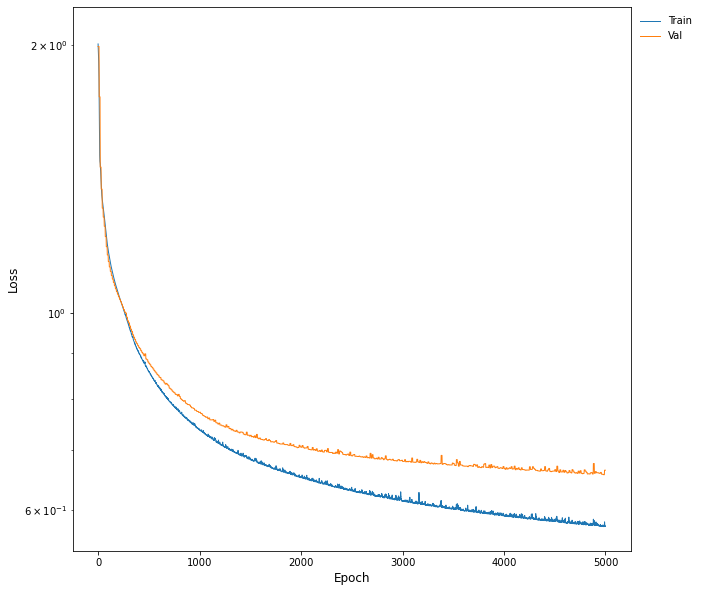

In [4]:
# Train/val loss fig
plt.figure(figsize=(10,10))
plt.plot(range(len(train_loss_list)), train_loss_list, label = 'Train')
plt.plot(range(len(val_loss_list)), val_loss_list, label = 'Val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.ylim(0,1.1*train_loss_list[0])
plt.show()

In [5]:
# Get predictions and ground truths
model, configs = load_model(model_type, fname, split)
syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset = get_prediction_and_ground_truths(model, configs)
mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df = get_metric_dataframes(configs)

Loading model and configs...
Getting model predictions and grouth truths...
SYSTEMS:
train+val: 1856 test: 464

n_datapoints:
train: 14749 val: 2107 test: 5168
Loading synthetic predictions from saved predictions...


# 1) Overall aggregated

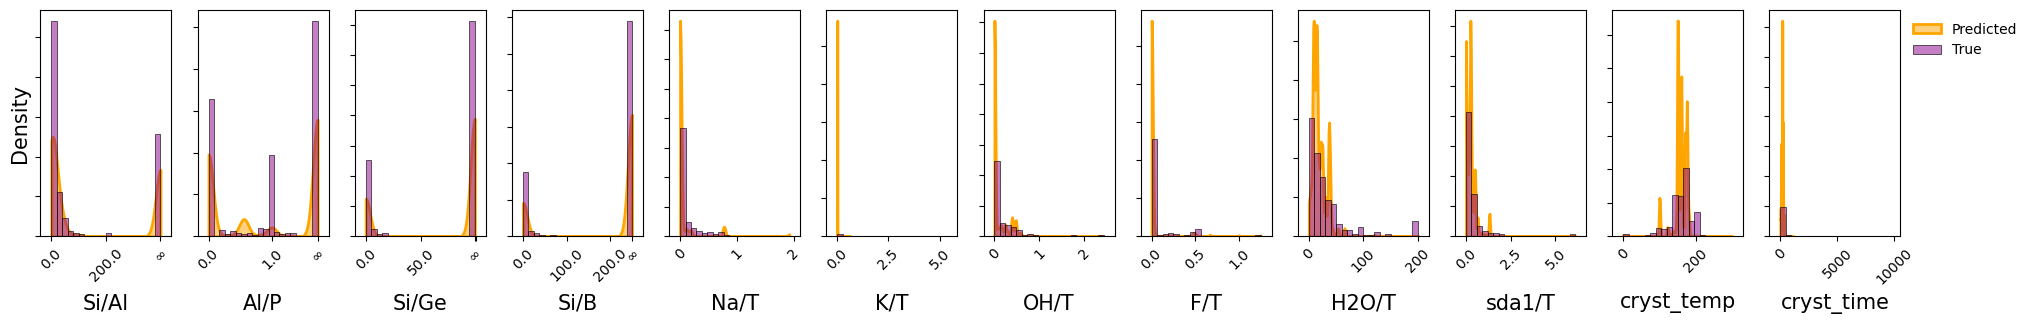

In [6]:
utils.compare_gel_conds([syn_pred, syn_true], ['Predicted', 'True'], [True, False], [False, True], ['orange', 'darkmagenta'], common_norm=True, alpha=0.5)

# 2) System-splits

### A) Zeolite-aggregated systems

Calculating metrics for zeolite-aggregated systems...
CHA


MMD: 0.7657308578491211
WSD: 0.2118076176186276


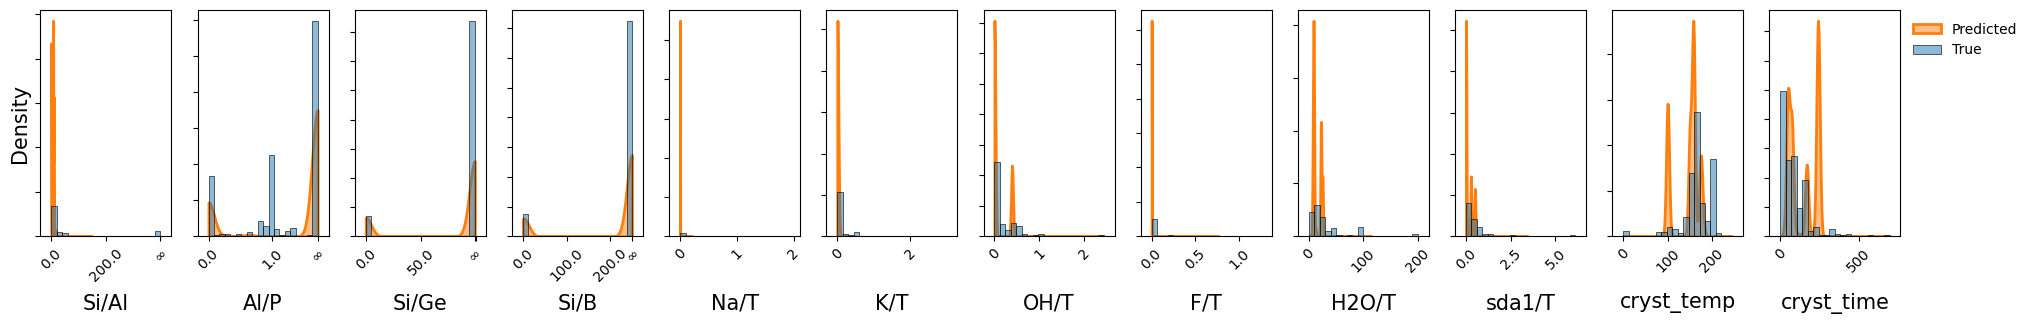

AEL
MMD: 2.7060346603393555
WSD: 0.3556750159778447


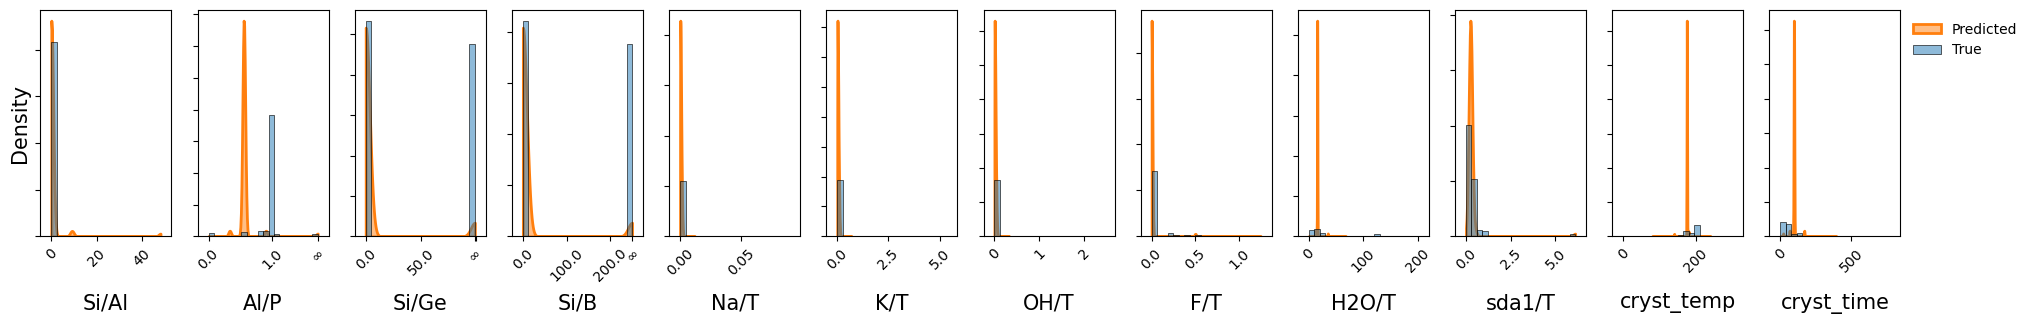

MFI
MMD: 0.6779155731201172
WSD: 0.09297286712817435


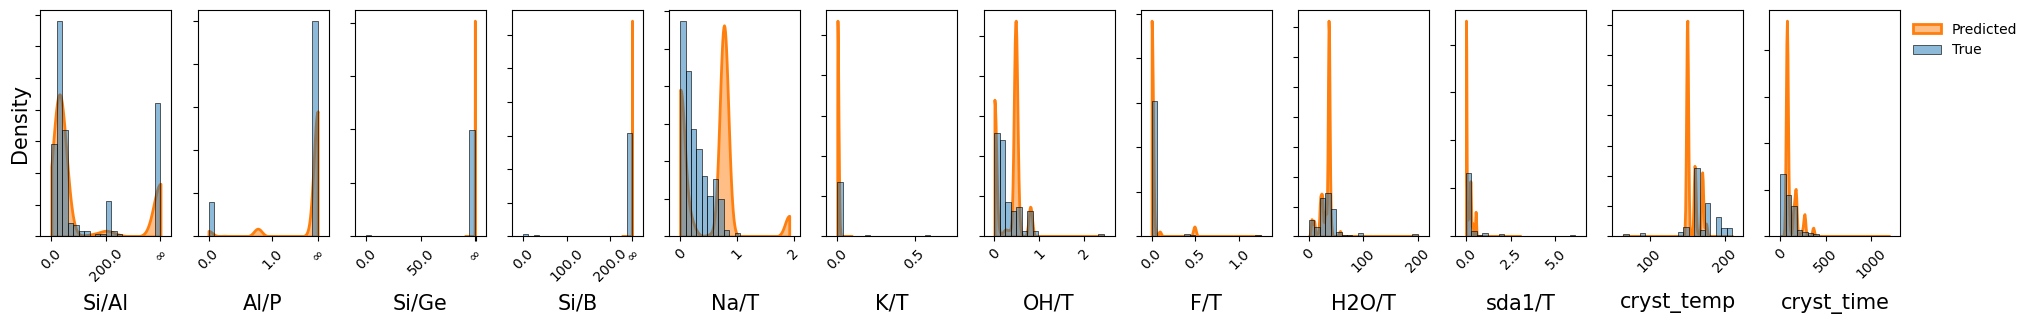

LTA
MMD: 1.6723613739013672
WSD: 0.5401346992760809


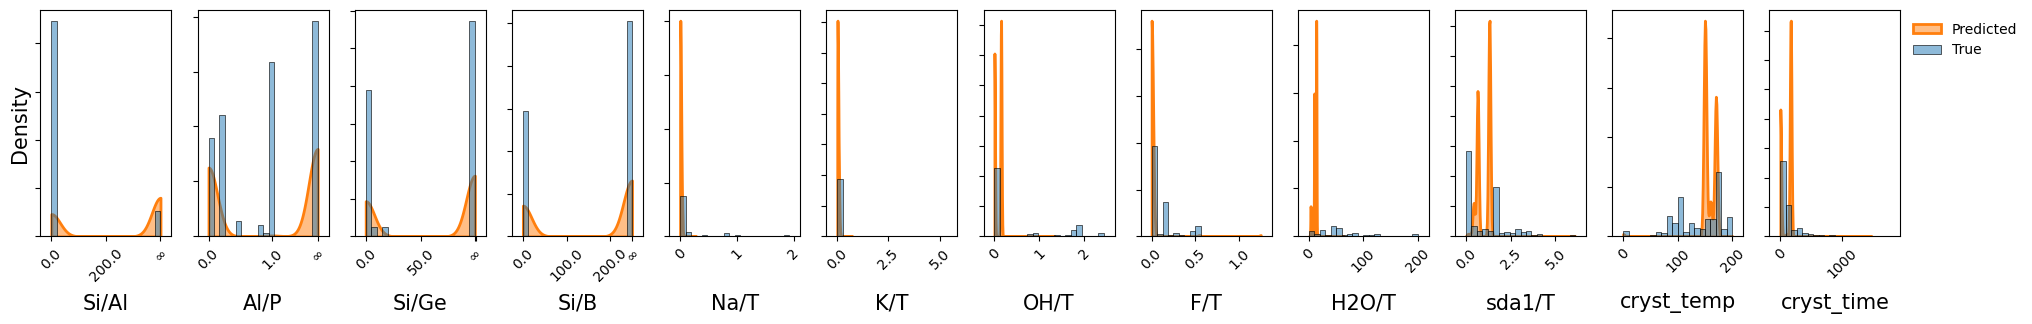

AFI
MMD: 1.087752342224121
WSD: 0.14409105636971614


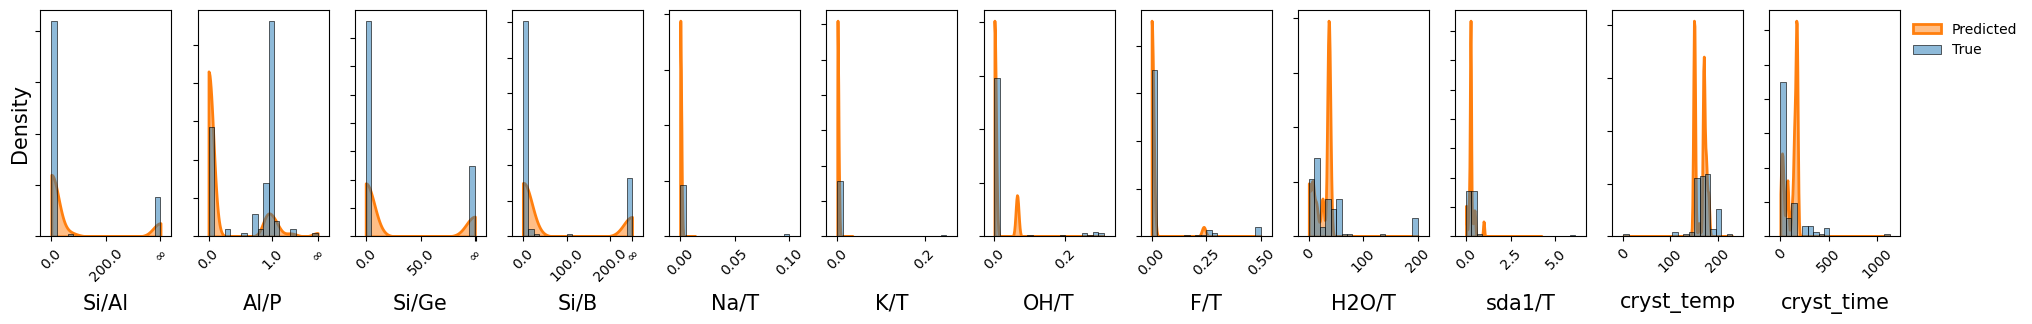

IWR
MMD: 3.1756744384765625
WSD: 0.8721028904903905


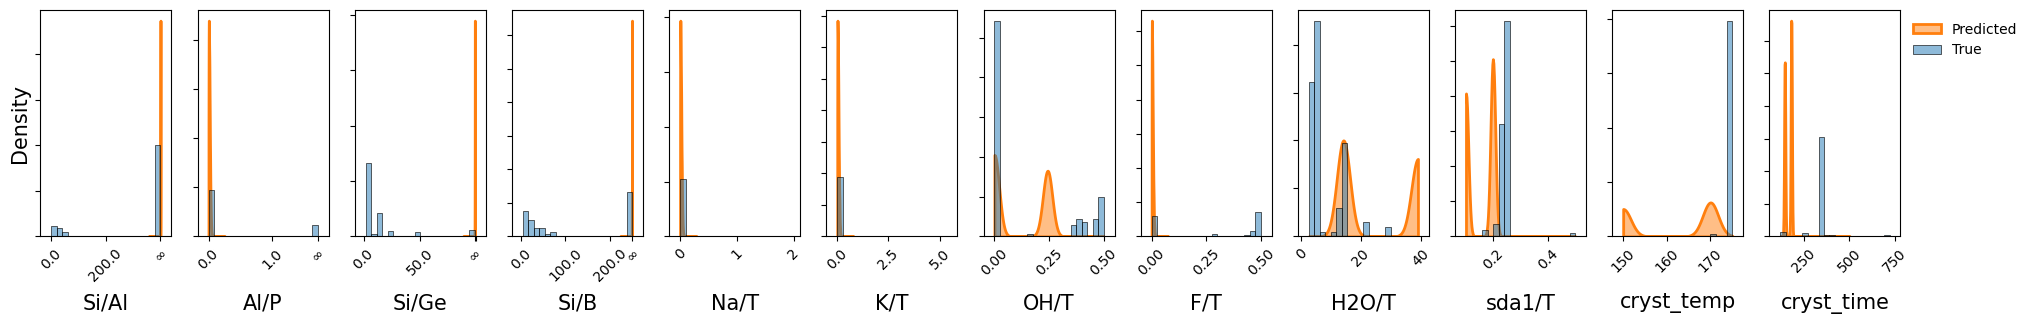

BEA
MMD: 0.6592769622802734
WSD: 0.2690122864625334


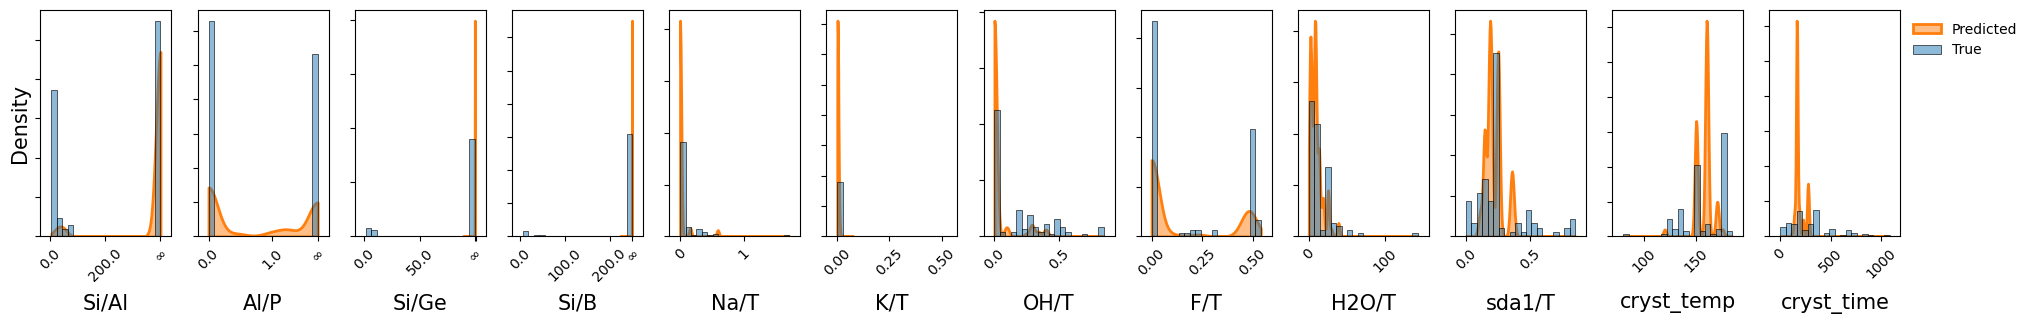

MTW
MMD: 0.5623998641967773
WSD: 0.12794699958224337


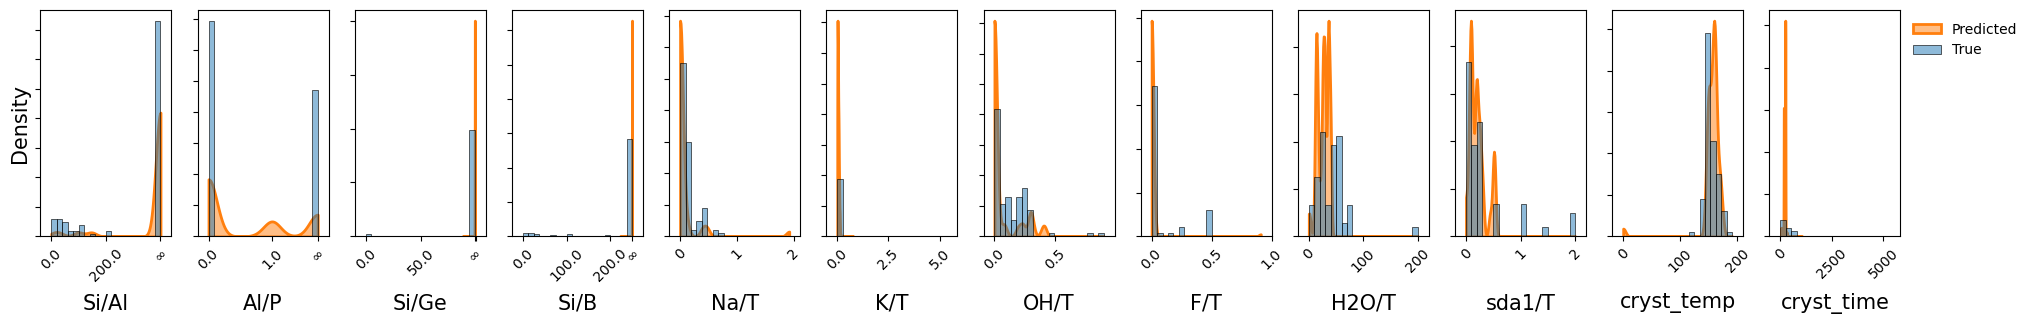

MEL
MMD: 2.019707679748535
WSD: 0.46999850283310274


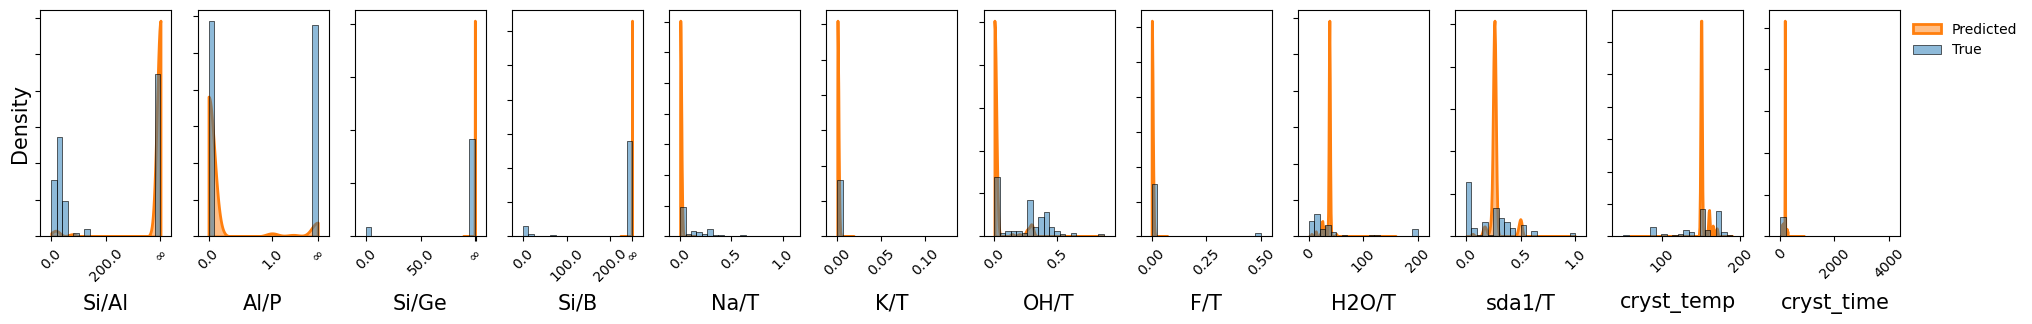

LEV
MMD: 1.3455896377563477
WSD: 0.22503151541875166


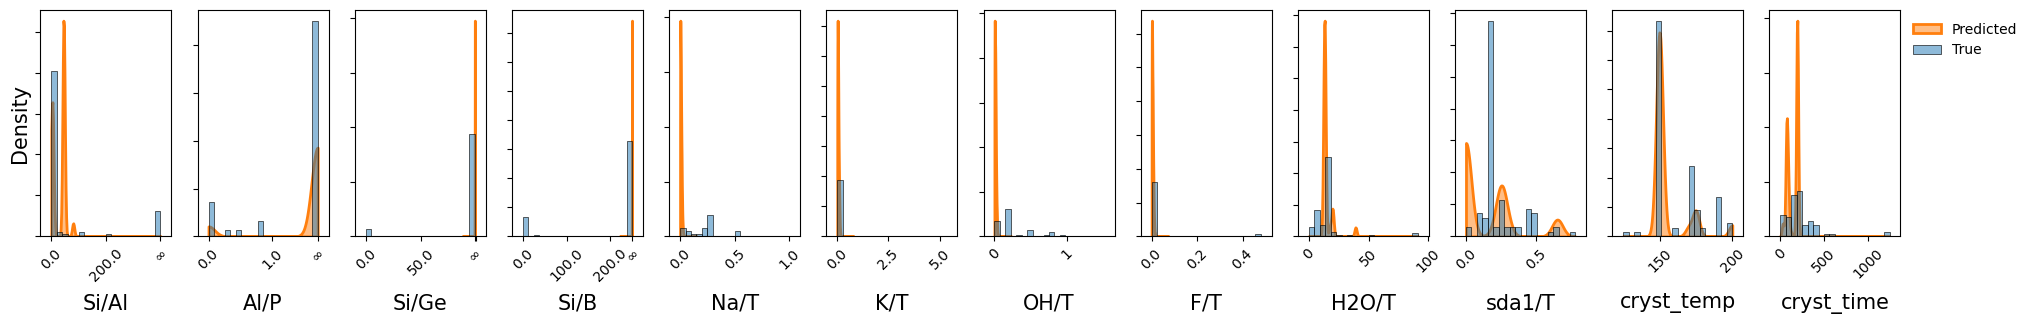

Si/Al_prec         0.9130
Al/P_prec          0.9635
Si/Ge_prec         1.0000
Si/B_prec          0.9810
Na/T_prec          0.9925
K/T_prec           1.0000
OH/T_prec          0.9015
F/T_prec           0.9935
H2O/T_prec         0.9515
sda1/T_prec        0.8960
cryst_temp_prec    0.9455
cryst_time_prec    0.8080
dtype: float64 Si/Al_rec         0.643646
Al/P_rec          0.815650
Si/Ge_rec         0.868061
Si/B_rec          0.883571
Na/T_rec          0.728087
K/T_rec           0.966252
OH/T_rec          0.709000
F/T_rec           0.819889
H2O/T_rec         0.638897
sda1/T_rec        0.712885
cryst_temp_rec    0.545245
cryst_time_rec    0.400370
dtype: float64                    0
Si/Al       0.778323
Al/P        0.889575
Si/Ge       0.934031
Si/B        0.932286
Na/T        0.860294
K/T         0.983126
OH/T        0.805250
F/T         0.906694
H2O/T       0.795198
sda1/T      0.804443
cryst_temp  0.745373
cryst_time  0.604185
Mean MMD: 1.4672443389892578
Mean WSD: 0.3308773451157465


/home/jupyter/Elton/Zeolites/zeosyn_gen/eval.py:376: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  prec_zeo_agg_df_mean, rec_zeo_agg_df_mean = prec_zeo_agg_df.mean(0), rec_zeo_agg_df.mean(0)


In [7]:
_, _ = eval_zeolite_aggregated(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs, eval=True, plot=True, print_metrics=True, num_systems=10)

SAV
MMD: 1.3749637603759766
WSD: 0.2419985611051411


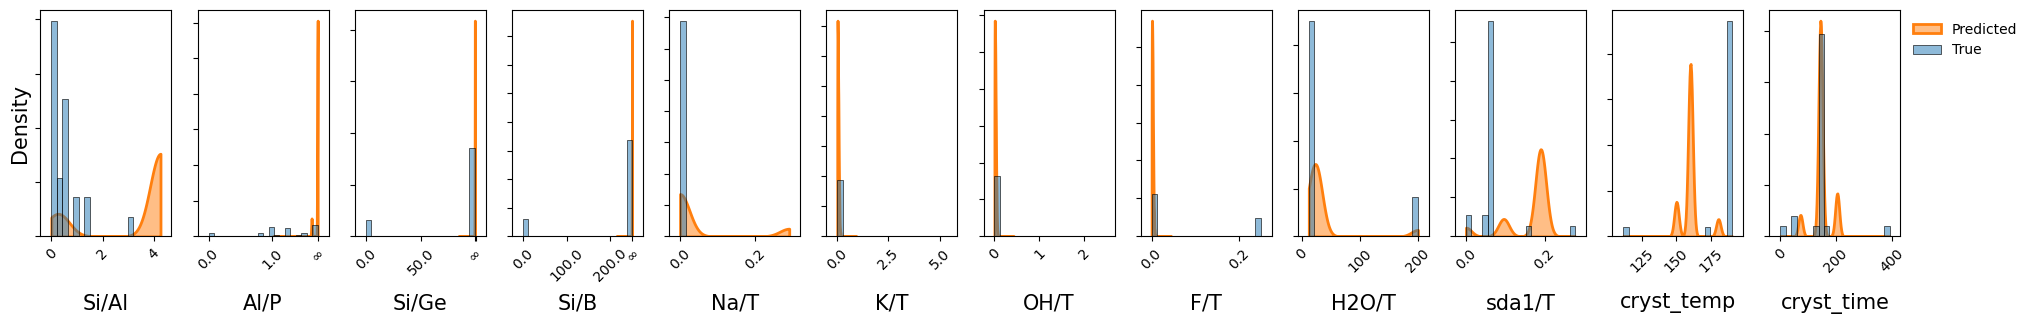

In [8]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='SAV')

BEC
MMD: 2.1769814491271973
WSD: 0.5764899366878502


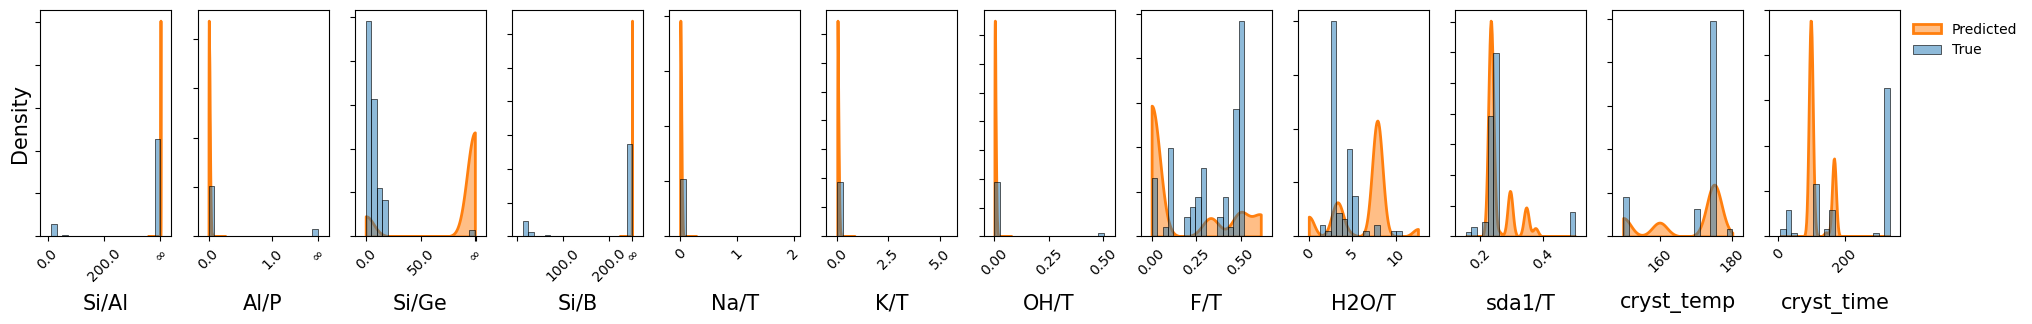

In [9]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='BEC')

### B) Zeolite-OSDA system

Calculating metrics for zeolite-OSDA systems...
CHA C[N+](C)(C)C12CC3CC(CC(C3)C1)C2


MMD: 2.2146120071411133
WSD: 0.45985077859798695


LinAlgError: singular matrix

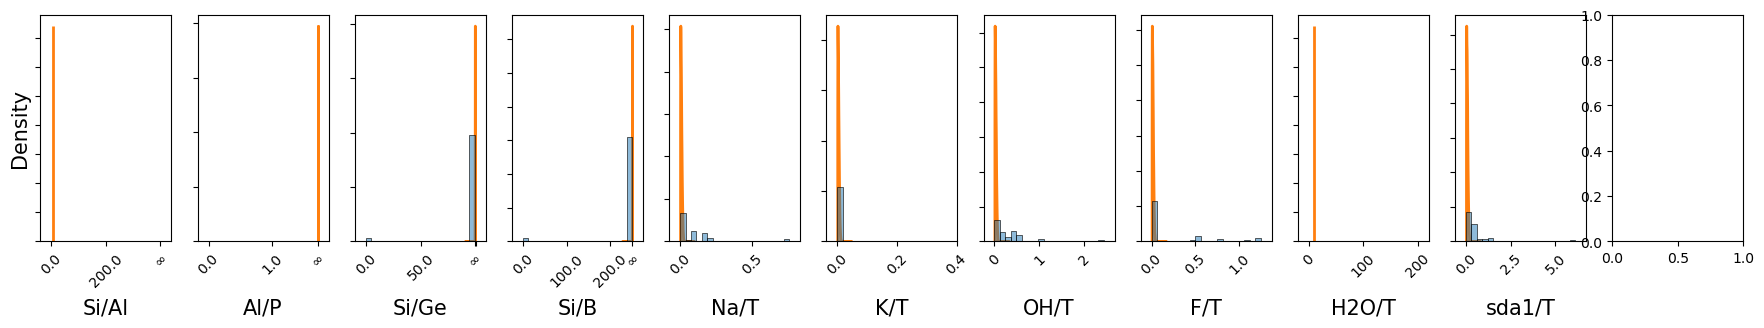

In [10]:
_, _ = eval_zeolite_osda(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, configs, eval=True, plot=True, print_metrics=True, num_systems=None)

CHA C[N+](C)(C)C12CC3CC(CC(C3)C1)C2
MMD: 2.2146120071411133
WSD: 0.4598507785979869


LinAlgError: singular matrix

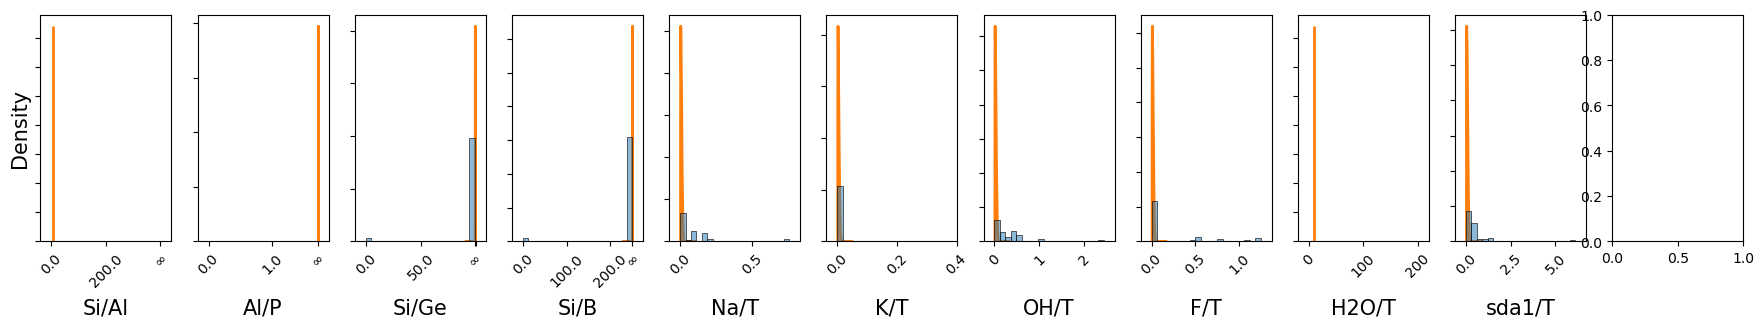

In [11]:
eval_single_system(syn_pred, syn_pred_scaled, syn_true, syn_true_scaled, dataset, mmd_zeo_agg_df, wsd_zeo_agg_df, mmd_zeo_osda_df, wsd_zeo_osda_df, zeo='CHA', osda='C[N+](C)(C)C12CC3CC(CC(C3)C1)C2')